In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

skills_df = pd.read_csv('job_skills.csv')
postings = pd.read_csv('linkedin_job_postings.csv')

In [33]:
skills_df.sample(10)

,job_link,job_skills
789831,https://www.linkedin.com/jobs/view/travel-alli...,"Surgical Technologist, CPR/BLS, Physical Abili..."
314481,https://www.linkedin.com/jobs/view/inpatient-p...,"Pulmonology, Critical Care, Advanced Practitio..."
243808,https://au.linkedin.com/jobs/view/event-and-in...,"Incident Management, Service Desk, Cloud Compu..."
613790,https://www.linkedin.com/jobs/view/retail-supe...,"Inventory Management, Leadership, Communicatio..."
1241163,https://www.linkedin.com/jobs/view/radiologic-...,"Radiology, Radiography, Diagnostic Imaging, BL..."
1287971,https://www.linkedin.com/jobs/view/senior-proj...,"System Engineering, Space Systems Engineering,..."
535159,https://www.linkedin.com/jobs/view/sr-software...,"Software Development, Software Testing, Softwa..."
1270970,https://www.linkedin.com/jobs/view/travel-rn-m...,"Travel nursing, Registered nurse (RN), Med Sur..."
770313,https://www.linkedin.com/jobs/view/nurse-pract...,"Nurse Practitioner License, Nurse Practitioner..."
162762,https://www.linkedin.com/jobs/view/food-servic...,"Child Nutrition Program, State and Federal gui..."


In [34]:
postings.sample(10)

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
448653,https://www.linkedin.com/jobs/view/it-architec...,2024-01-19 09:45:09.215838+00,t,t,f,IT Architect Senior,Jobs for Humanity,"Jacksonville, FL",2024-01-13,Jacksonville,United States,Interior Designer,Mid senior,Onsite
235012,https://www.linkedin.com/jobs/view/risk-manage...,2024-01-20 01:32:52.429622+00,t,t,f,Risk Management/ Security Supervisor,Fairmont Sonoma Mission Inn & Spa,"Sonoma, CA",2024-01-16,San Rafael,United States,Public-Safety Officer,Mid senior,Onsite
357479,https://uk.linkedin.com/jobs/view/gp-at-flame-...,2024-01-19 09:45:09.215838+00,t,t,f,Gp,Flame Health Associates LLP,"Tyne & Wear, England, United Kingdom",2024-01-13,Tyneside,United Kingdom,Family Practitioner,Mid senior,Onsite
189787,https://www.linkedin.com/jobs/view/gastroenter...,2024-01-19 09:45:09.215838+00,f,f,f,"Gastroenterologist, Advanced Endoscopist - Kai...",Health eCareers,"Kailua, HI",2024-01-16,Kaneohe,United States,Medical Physicist,Mid senior,Onsite
623333,https://www.linkedin.com/jobs/view/personal-fi...,2024-01-19 09:45:09.215838+00,t,t,f,"Personal Financial Counselor III; Chattanooga, TN",Magellan Health,"Chattanooga, TN",2024-01-13,Chattanooga,United States,Consultant Education,Mid senior,Onsite
876855,https://www.linkedin.com/jobs/view/senior-acco...,2024-01-21 08:31:46.313573+00,t,t,f,Senior Accountant (Audit- Government),Sikich,"St Louis, MO",2024-01-14,Belleville,United States,Tax Preparer,Mid senior,Onsite
315216,https://www.linkedin.com/jobs/view/travel-rn-e...,2024-01-19 09:45:09.215838+00,t,t,f,Travel RN - ER/Trauma,TLC Travel Staff,"Albuquerque, NM",2024-01-12,Albuquerque,United States,Christian Science Nurse,Mid senior,Onsite
477858,https://www.linkedin.com/jobs/view/customer-se...,2024-01-19 09:45:09.215838+00,t,t,f,CUSTOMER SERVICE REPRESENTATIVE,Family Dollar,"Payette, ID",2024-01-12,Idaho,United States,Car Inspector,Mid senior,Onsite
734613,https://www.linkedin.com/jobs/view/ultrasound-...,2024-01-19 09:45:09.215838+00,t,t,f,Ultrasound Technologist II RVT - CMC Ultrasoun...,John Muir Health,"Concord, CA",2024-01-13,Concord,United States,Medical Technologist,Mid senior,Onsite
577098,https://www.linkedin.com/jobs/view/senior-php-...,2024-01-19 09:45:09.215838+00,t,t,f,Senior PHP Developer,MindPal,"Grand Rapids, MI",2024-01-13,Grand Rapids,United States,Data Base Administrator,Mid senior,Onsite


# Базовая информация

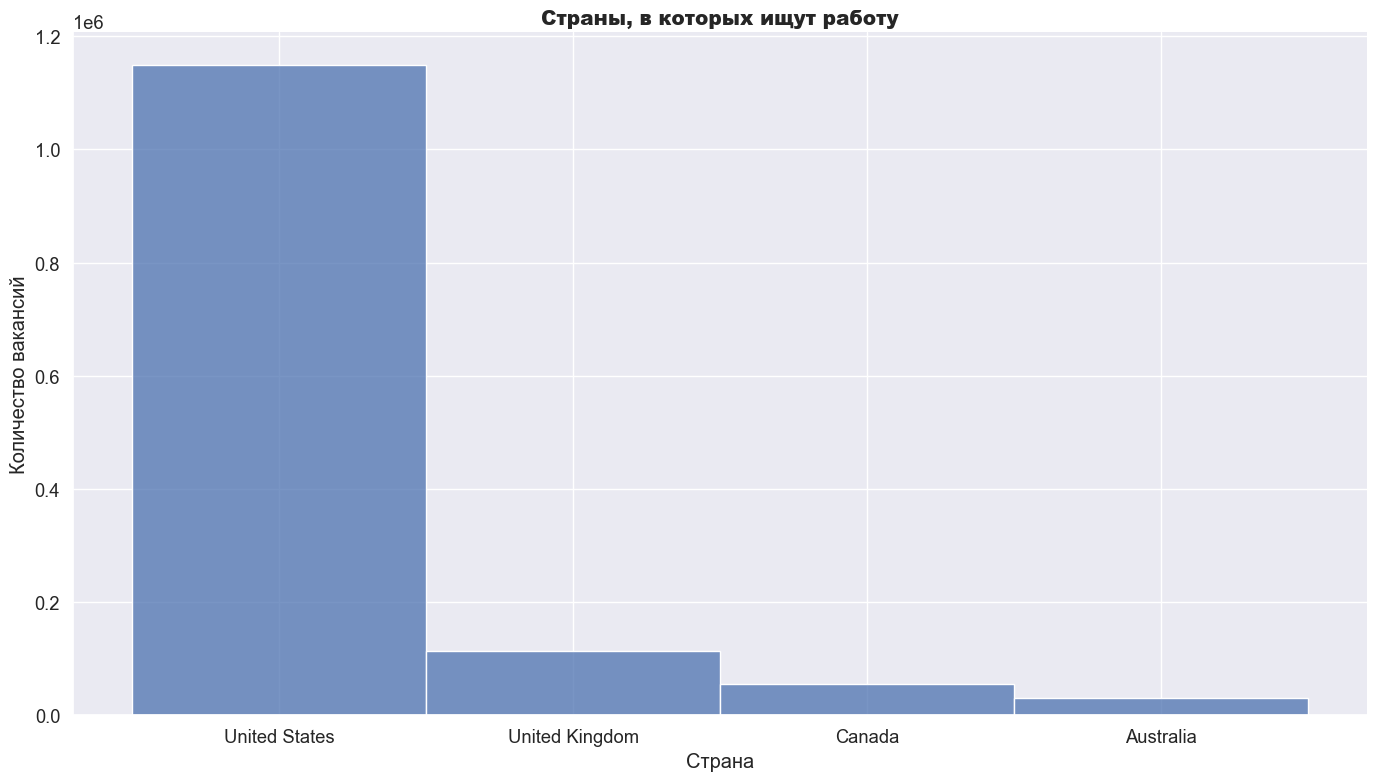

In [35]:
sns.set(font_scale=1.2)
sns.displot(data=postings, x="search_country", height=8, aspect = 1.75)
plt.xlabel("Страна")
plt.ylabel("Количество вакансий")
plt.title("Страны, в которых ищут работу", weight="heavy")
plt.show()

Видим только 4 страны.
Теперь рассмотрим по типу работы:

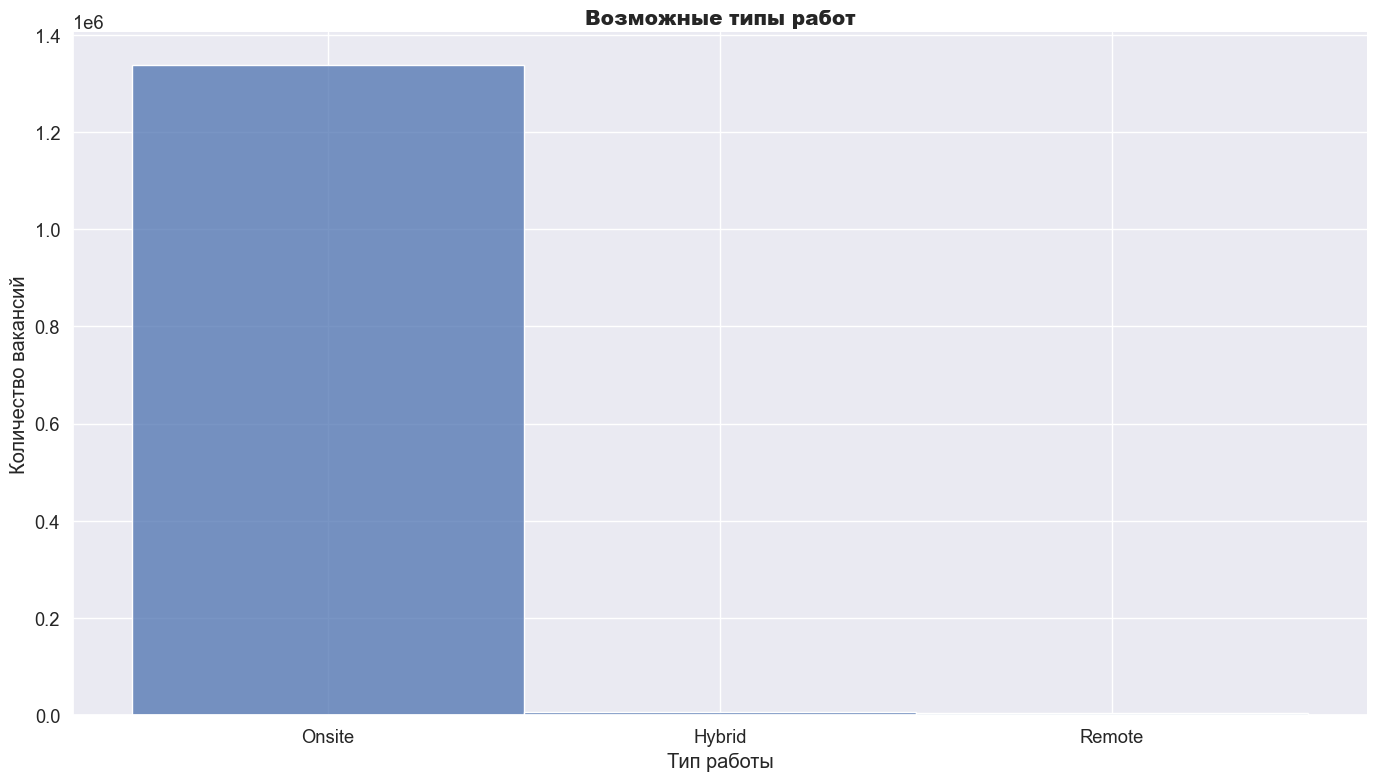

In [36]:
sns.displot(data=postings, x="job_type", height = 8, aspect = 1.75)
plt.xlabel("Тип работы")
plt.ylabel("Количество вакансий")
plt.title("Возможные типы работ", weight="heavy")
plt.show()

Сравним кол-во гибридных и удаленных вакансий

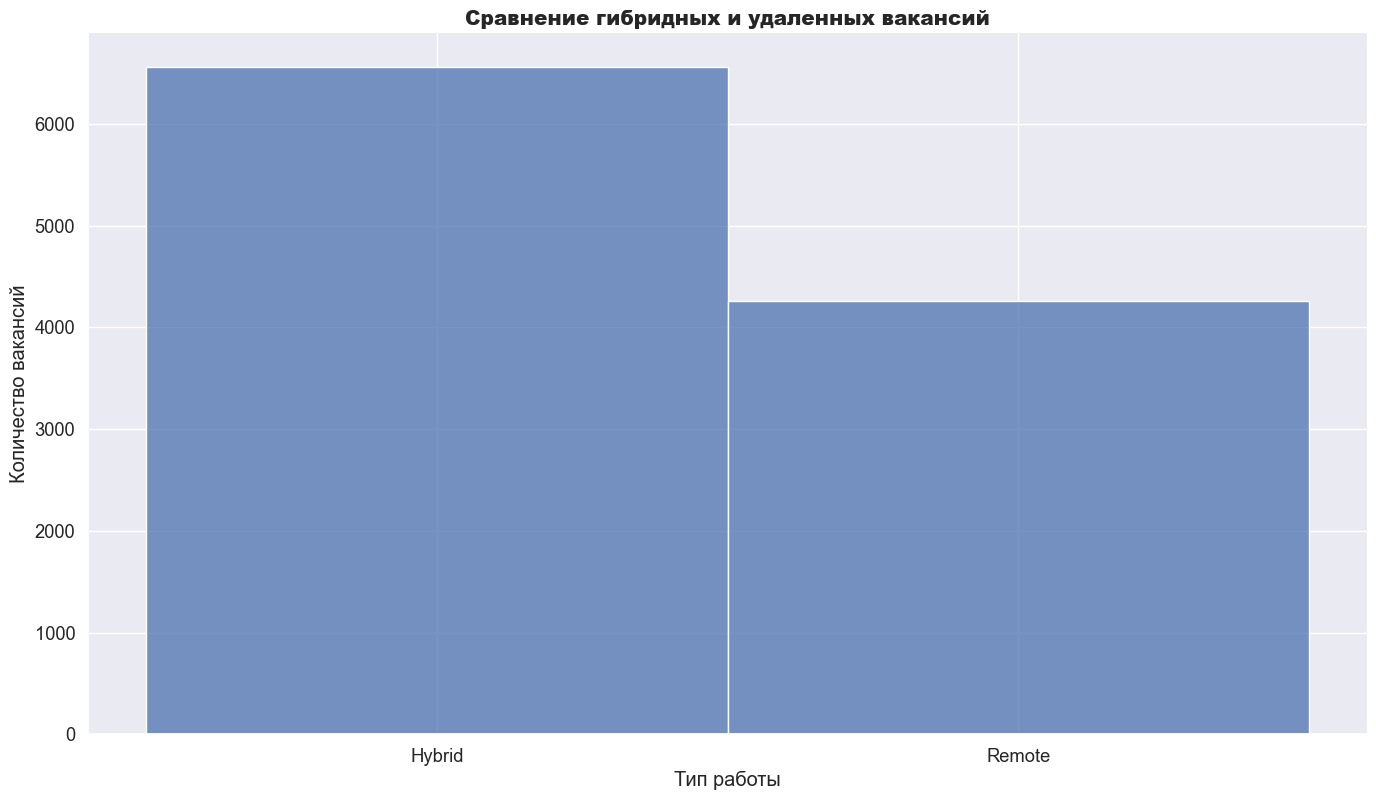

In [37]:
postings_1 = postings.loc[postings['job_type'].isin(['Hybrid','Remote'])]

sns.displot(data=postings_1, x="job_type", height = 8, aspect = 1.75)
plt.xlabel("Тип работы")
plt.ylabel("Количество вакансий")
plt.title("Сравнение гибридных и удаленных вакансий", weight="heavy")
plt.show()

# Анализ востребуемых навыков в зависимости от штата США

In [38]:
def linkloc(df1, df2):
  df3 = df2.loc[df2['job_link'].isin(df1['job_link'].tolist())]
  return df3

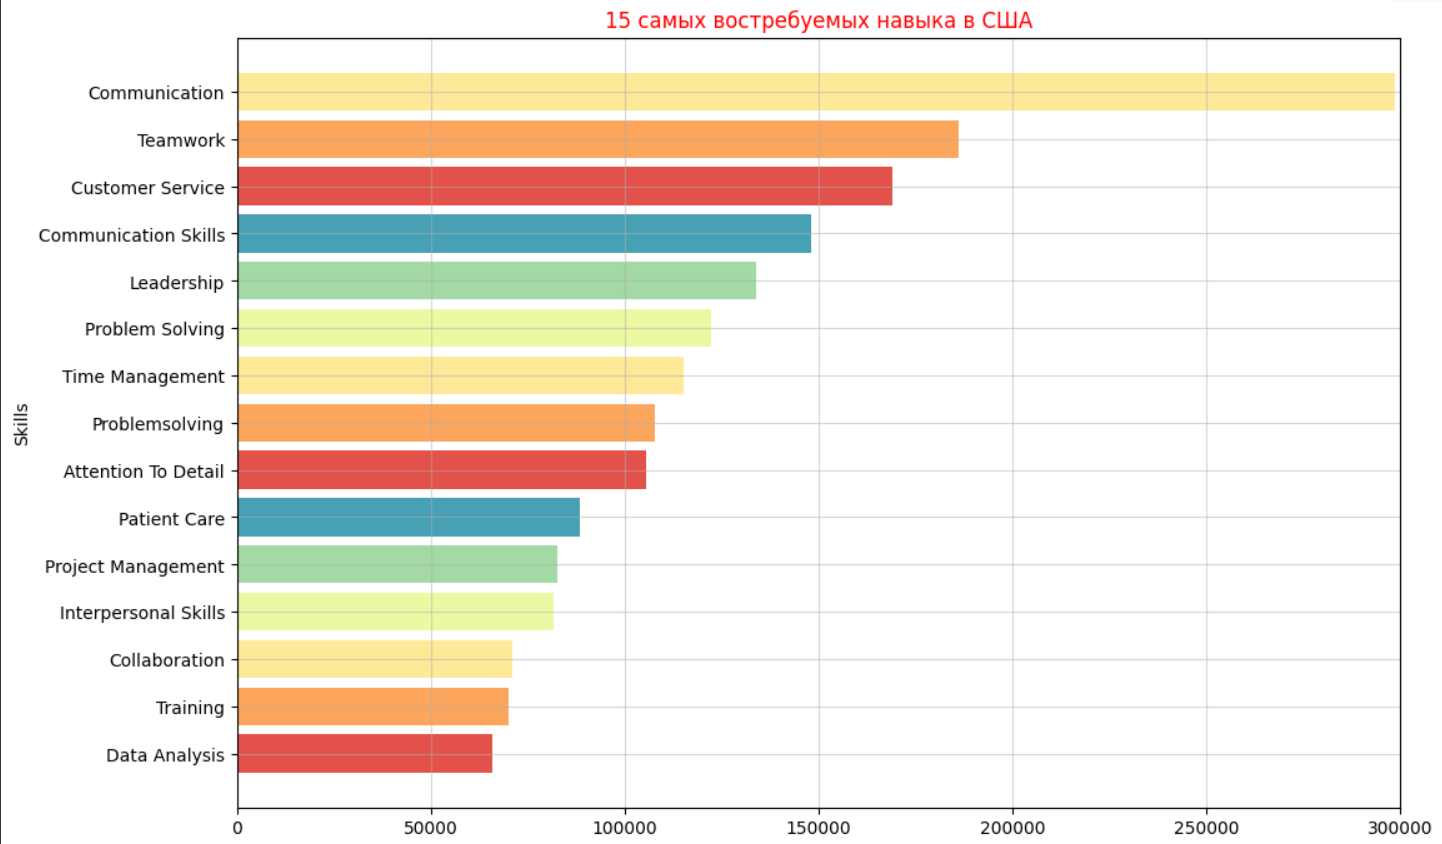


Patient care находится на 10 месте в рейтинге самых востребованых навыков в США. Проверим гипотезу: навык заботы о пациентах в штатах с большим уровнем преступности будет более востребован, чем в безопасных штатах. 

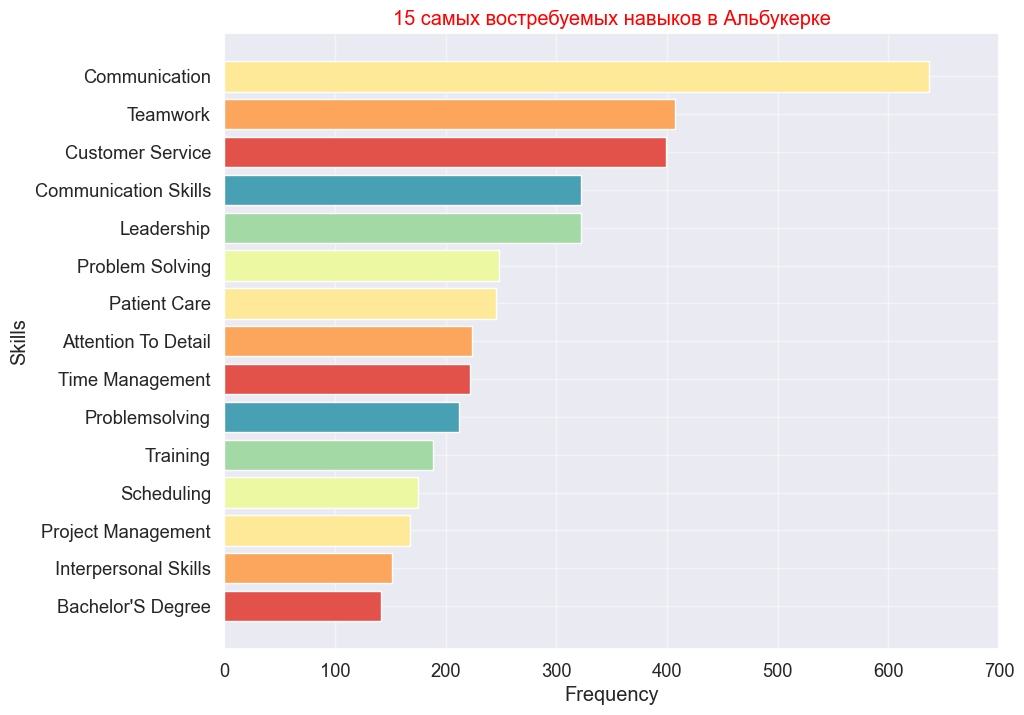

In [39]:
postings_1 = postings.loc[postings['job_location'] == 'Albuquerque, NM']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Альбукерке', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 700)
plt.show()

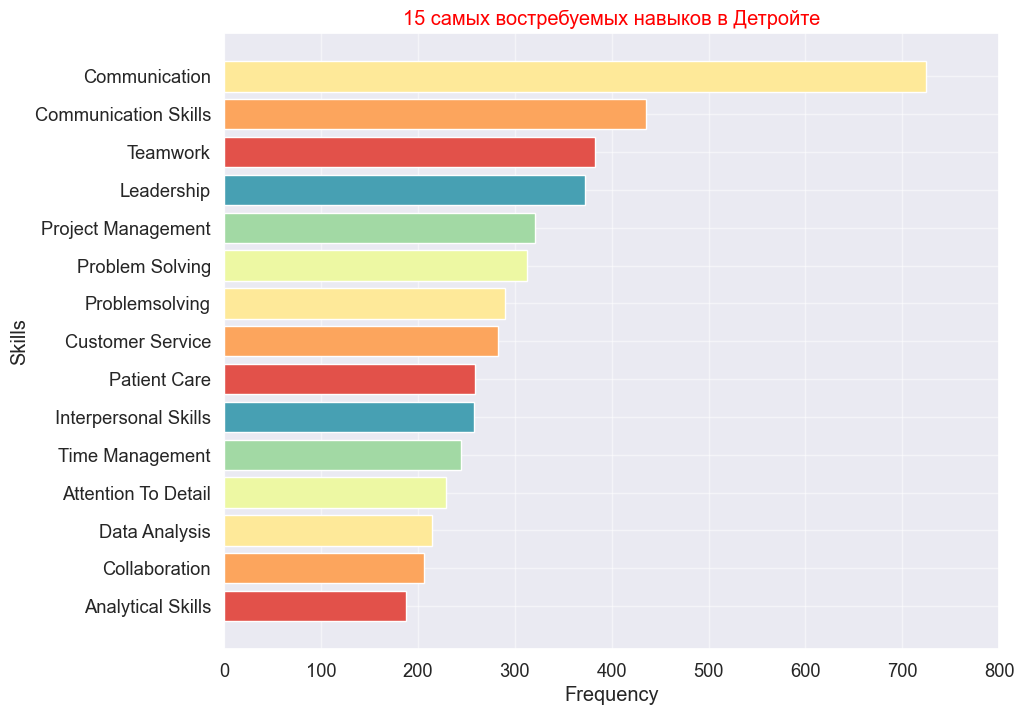

In [40]:
postings_1 = postings.loc[postings['job_location'] == 'Detroit, MI']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Детройте', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 800)
plt.show()

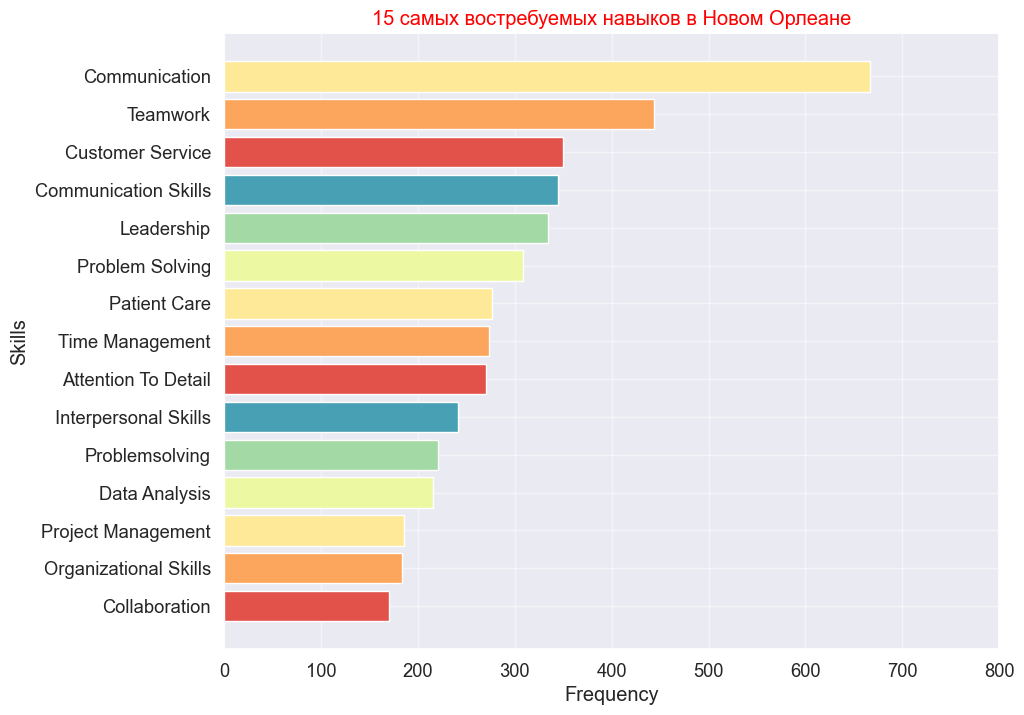

In [41]:
postings_1 = postings.loc[postings['job_location'] == 'New Orleans, LA']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Новом Орлеане', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 800)
plt.show()

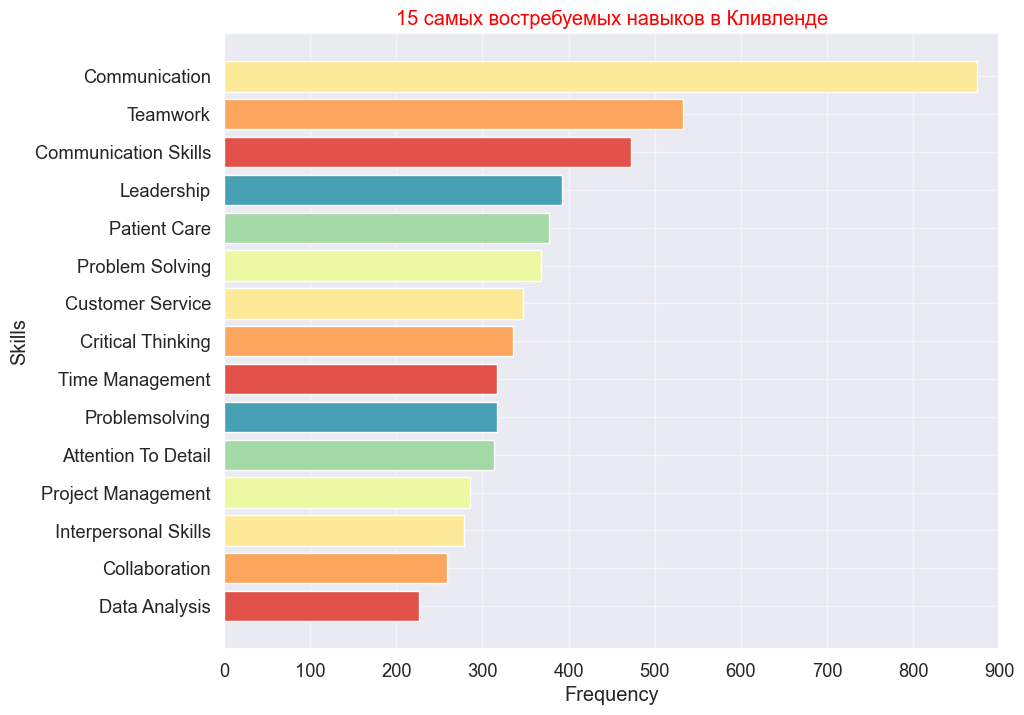

In [42]:
postings_1 = postings.loc[postings['job_location'] == 'Cleveland, OH']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))


plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Кливленде', color='red')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 900)
plt.show()

Во всех представленных преступных городах, Patient Care находился выше 10-ого места 

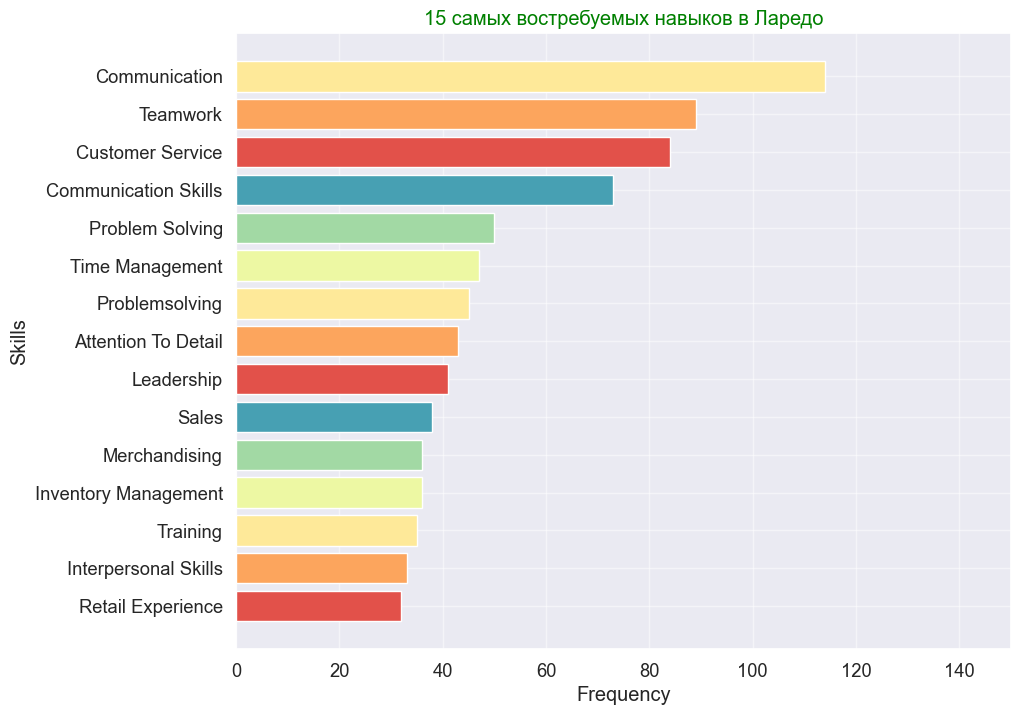

In [43]:
postings_1 = postings.loc[postings['job_location'] == 'Laredo, TX']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))


plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Ларедо', color='green')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 150)
plt.show()

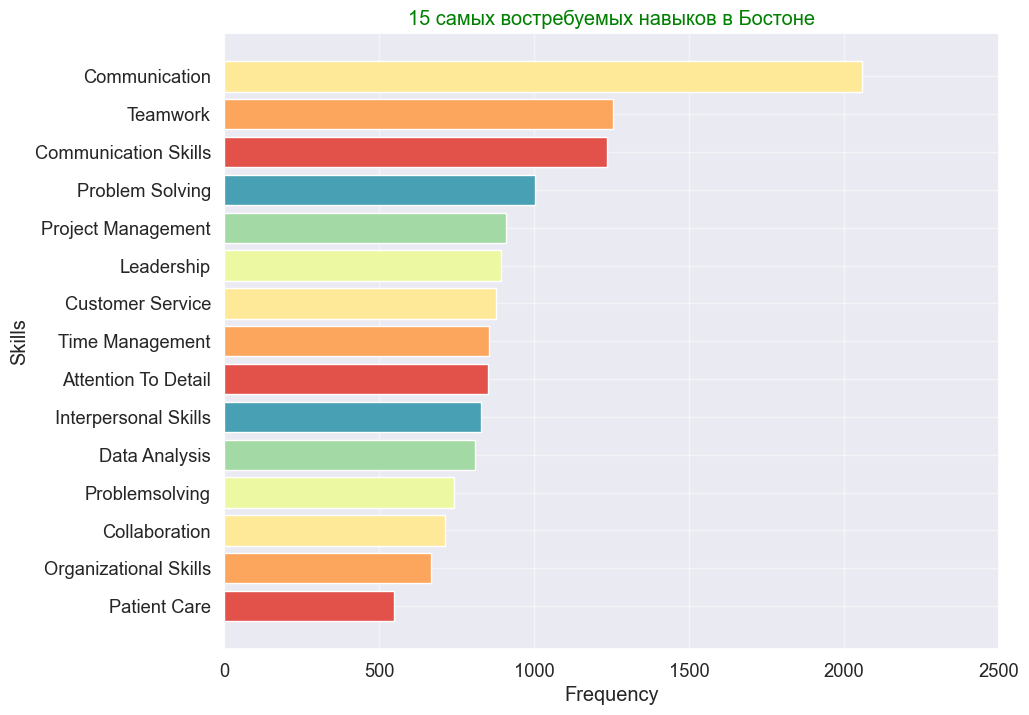

In [44]:
postings_1 = postings.loc[postings['job_location'] == 'Boston, MA']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Бостоне', color='green')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 2500)
plt.show()

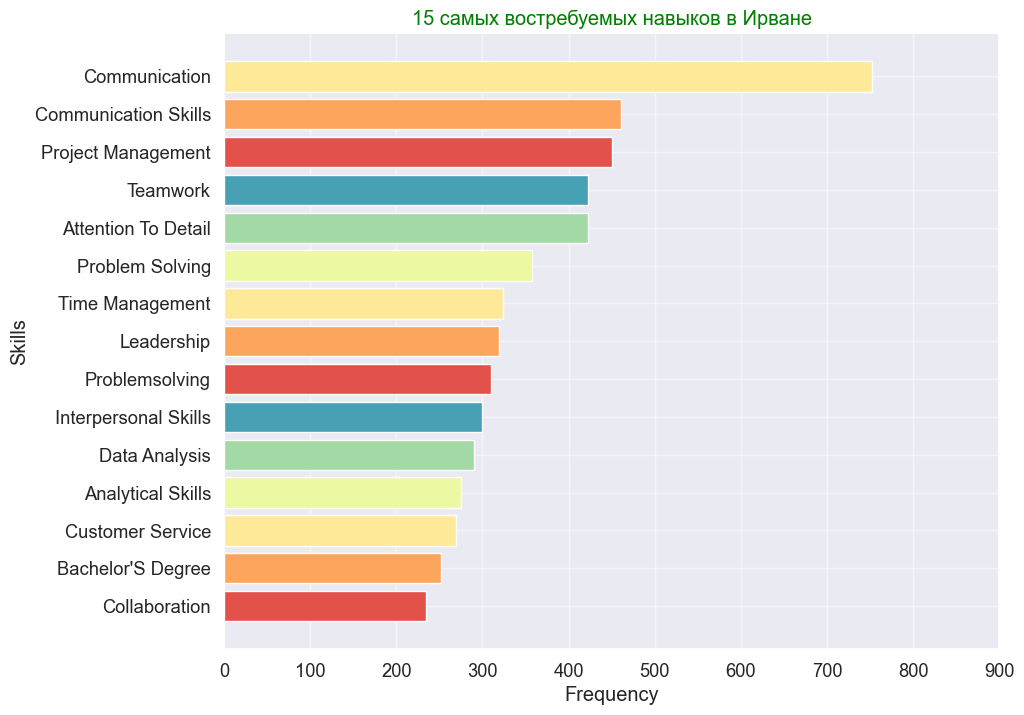

In [45]:
postings_1 = postings.loc[postings['job_location'] == 'Irvine, CA']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Ирване', color='green')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 900)
plt.show()

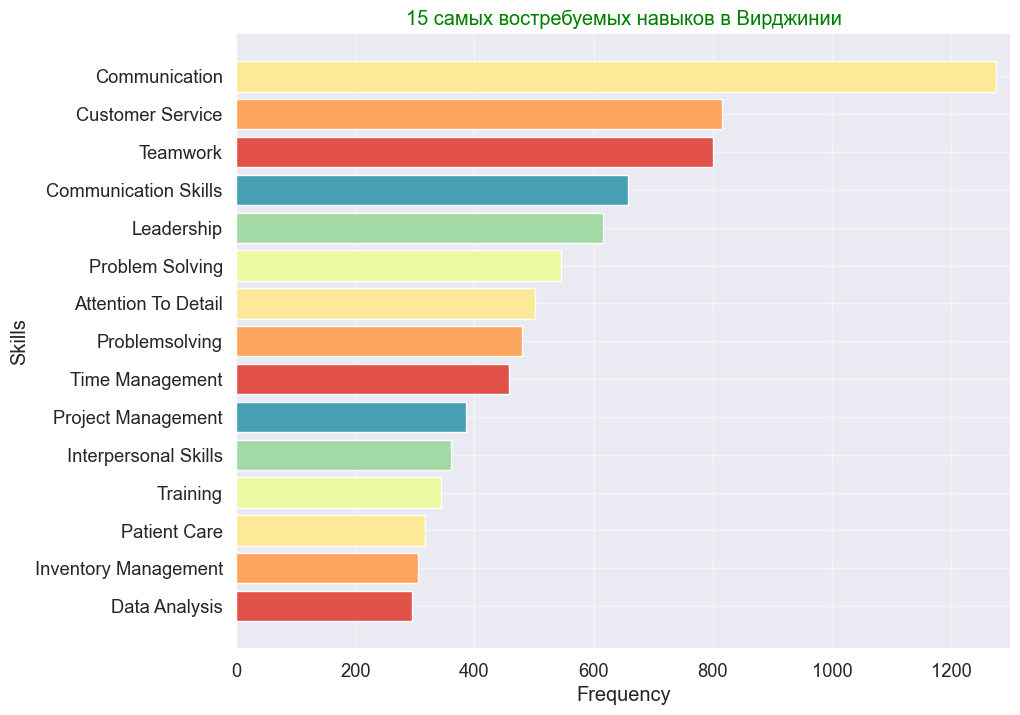

In [46]:
postings_1 = postings.loc[postings['search_city'] == 'Virginia']
skills_df1 = linkloc(postings_1, skills_df)
skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skills += str(skill).lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(10, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков в Вирджинии', color='green')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 1300)
plt.show()

Во всех представленных безопасных городах Patient Care находиться за пределами топ-10. 
Таким образом можно сделать вывод, что гипотеза скорее всего верна

# Анализ популярности позиций

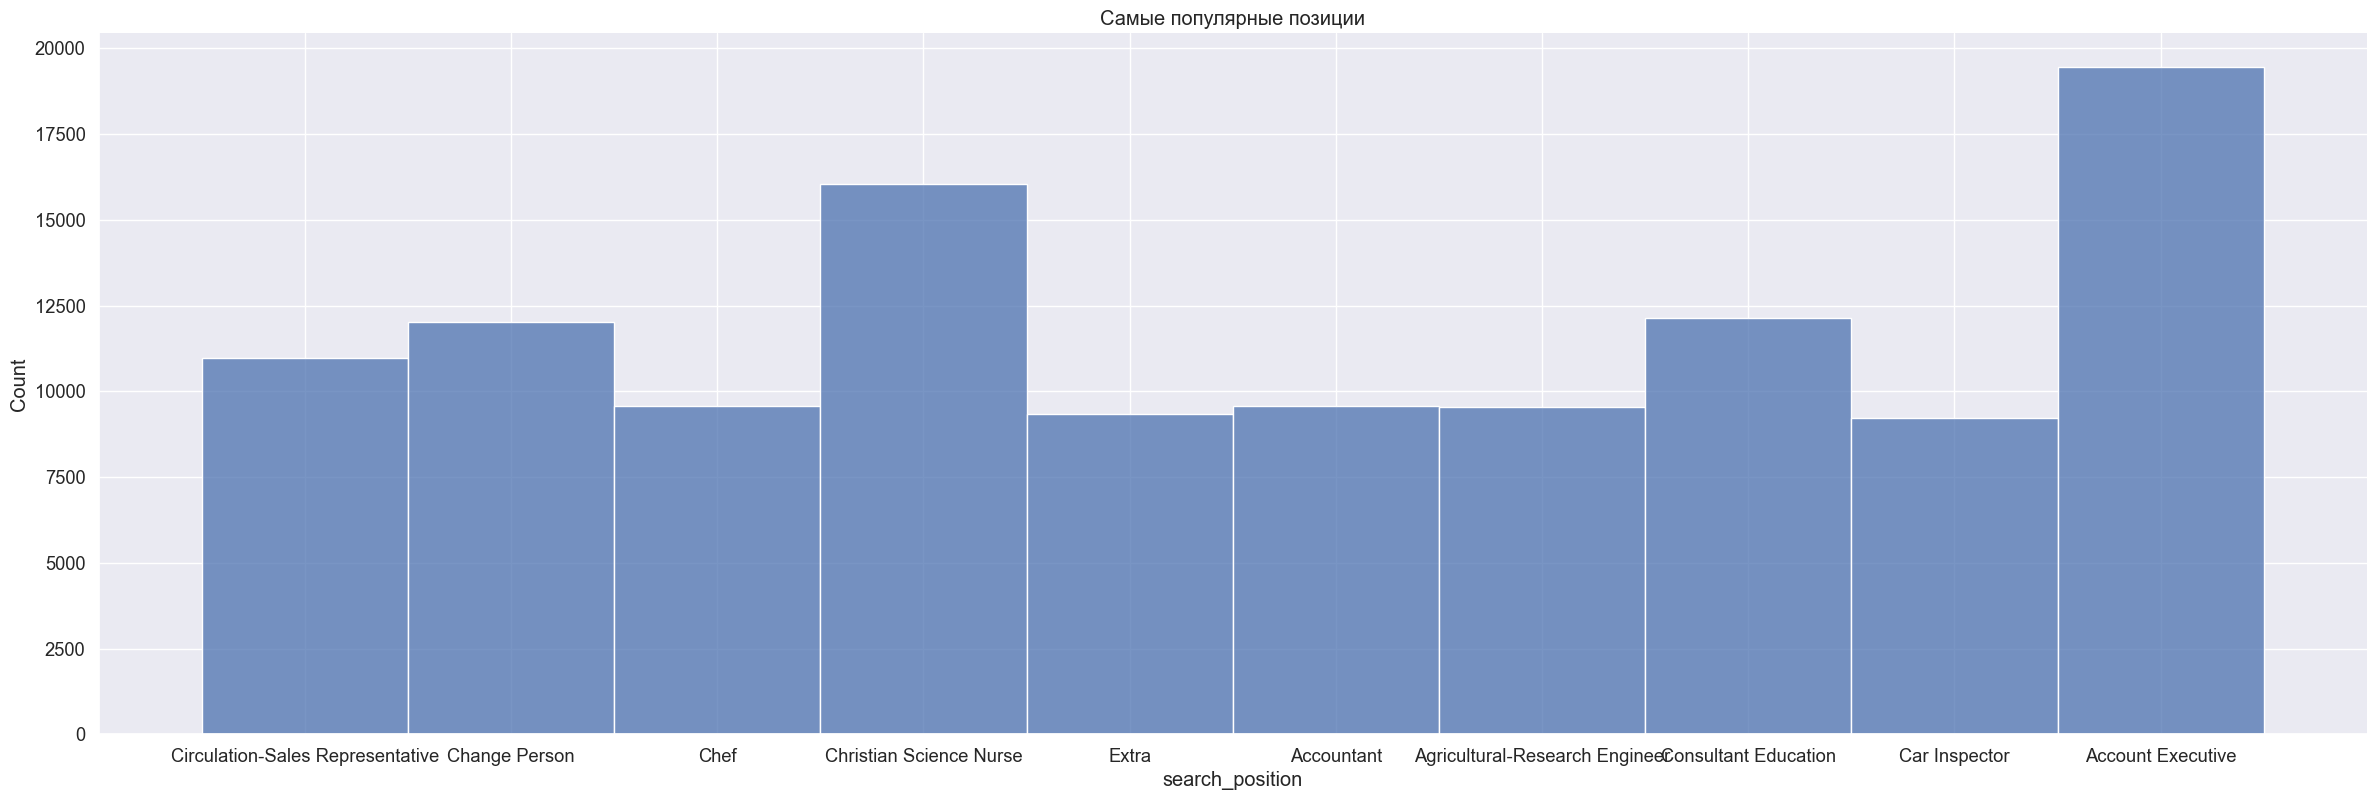

In [47]:
postings_1 = postings[postings['search_position'].isin(postings['search_position'].value_counts()[:10].index.tolist())]
sns.displot(
    data= postings_1,
    x="search_position",
    height=8,
    aspect = 3,
    kind = "hist"
)
plt.title("Самые популярные позиции")
plt.show()

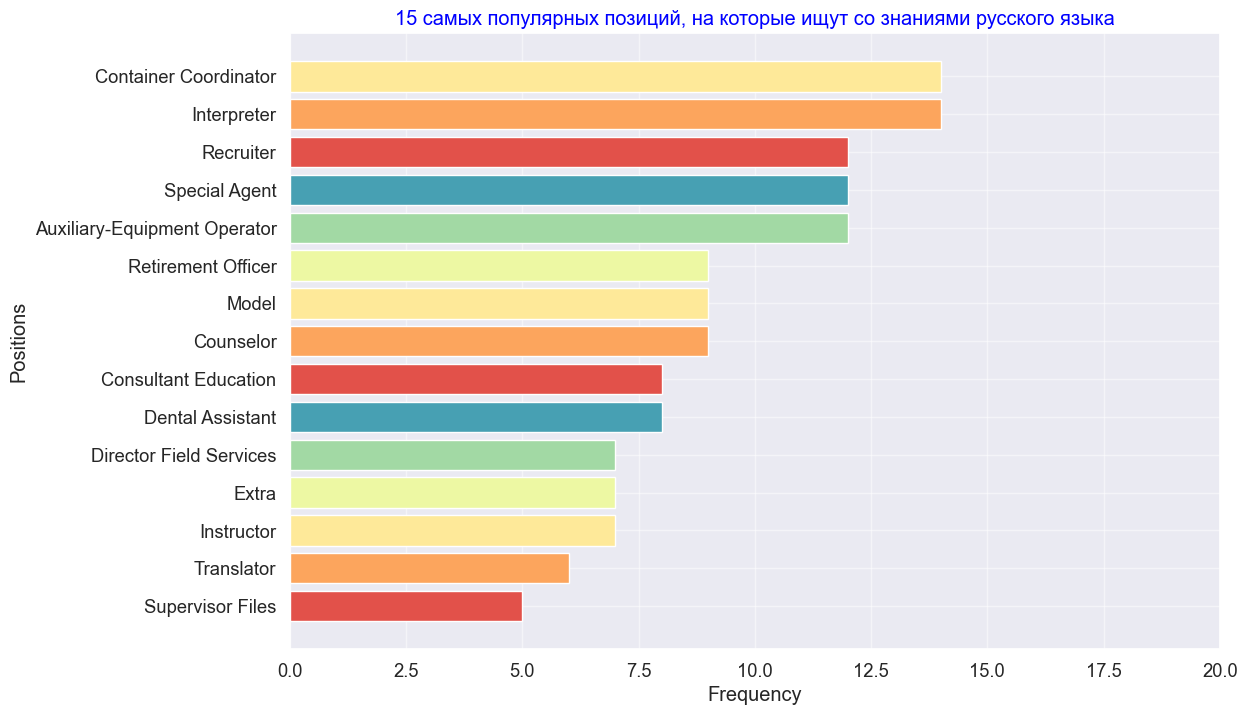

In [48]:
skills_df1 = skills_df[skills_df['job_skills'].str.contains('Russian')==True]
postings2 = linkloc(skills_df1, postings)
postings2

skills = ''
for skill in postings2.search_position:
    skills = skills + ';' + skill

skills = skills.split(';')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills

labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Positions')
plt.title('15 самых популярных позиций, на которые ищут со знаниями русского языка', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 20)
plt.show()


# Анализ количества просмотров вакансий

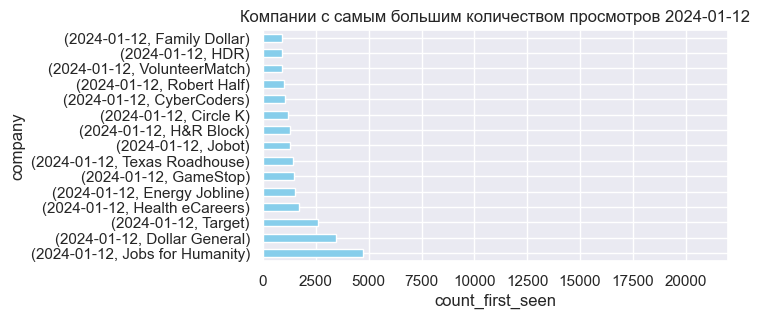

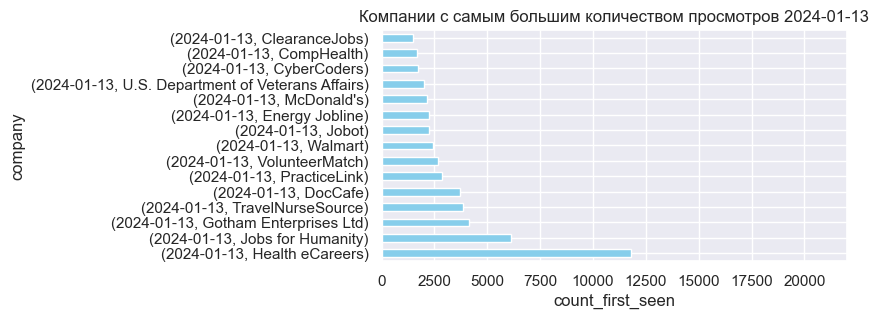

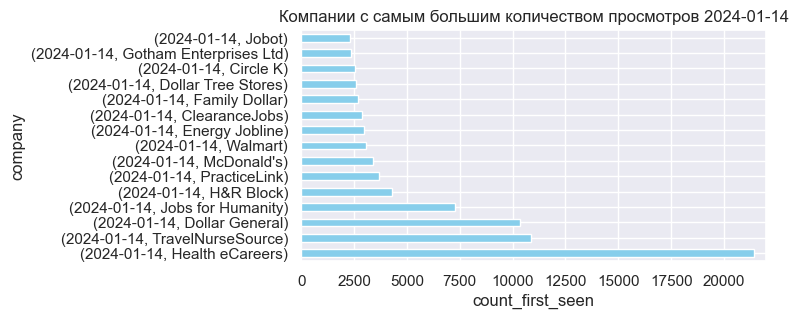

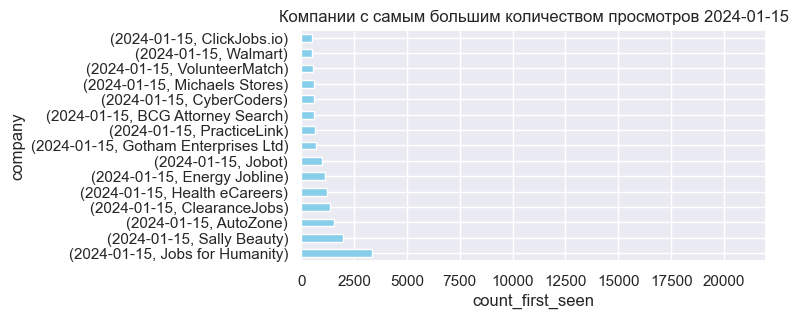

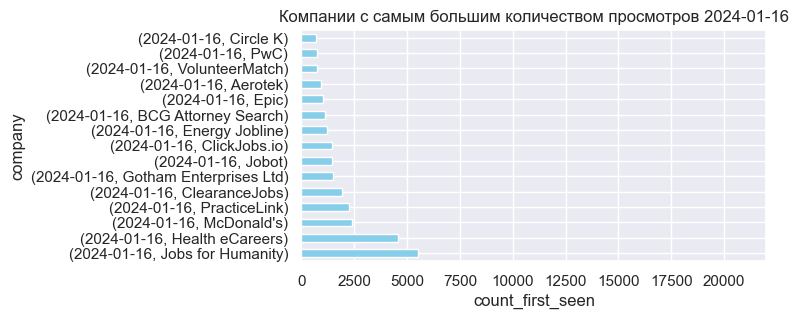

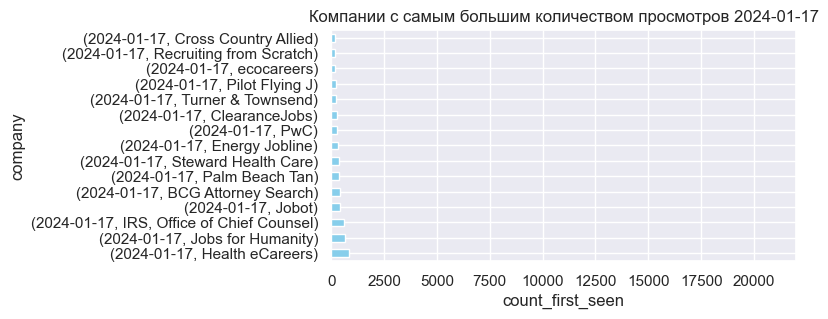

In [49]:

array = postings.groupby('first_seen')['company'].value_counts()

# Создание таблицы с первыми 15 самыми часто посещаемыми сайтами для каждого дня
top_sites_by_day = array.groupby(level=0).nlargest(15)

sns.set(font_scale=1)
# Построение отдельной горизонтальной столбчатой диаграммы для каждого дня
for day in top_sites_by_day.index.levels[0]:
    top_sites_day = top_sites_by_day.loc[day]
    plt.figure(figsize=(6, 3))
    top_sites_day.plot(kind='barh', color='skyblue')
    plt.xlabel('count_first_seen')
    plt.ylabel('company')
    plt.title(f'Компании с самым большим количеством просмотров {day}')
    plt.xlim(0, 22000)
    plt.show()

Мы решили проанализировать компании с самым большим кол-вом просмотров. В таблице представлены дни с 12 по 17 числа, с пятницы по среду. Графики показывают, что в рабочие дни количество просмотров составляет около 5000, в то время как в выходные – от 11 до 20 тысяч. Это можно объяснить тем, что в выходные у людей больше свободного времени, и они могут посмотреть вакансии или новую работу.

# Анализ востребованых навыков

В skills есть не мало требований, которые обозначают одно и то же, но записаны по-разному. Некоторые одинаковые скиллы я объединил в один с помощью replace.

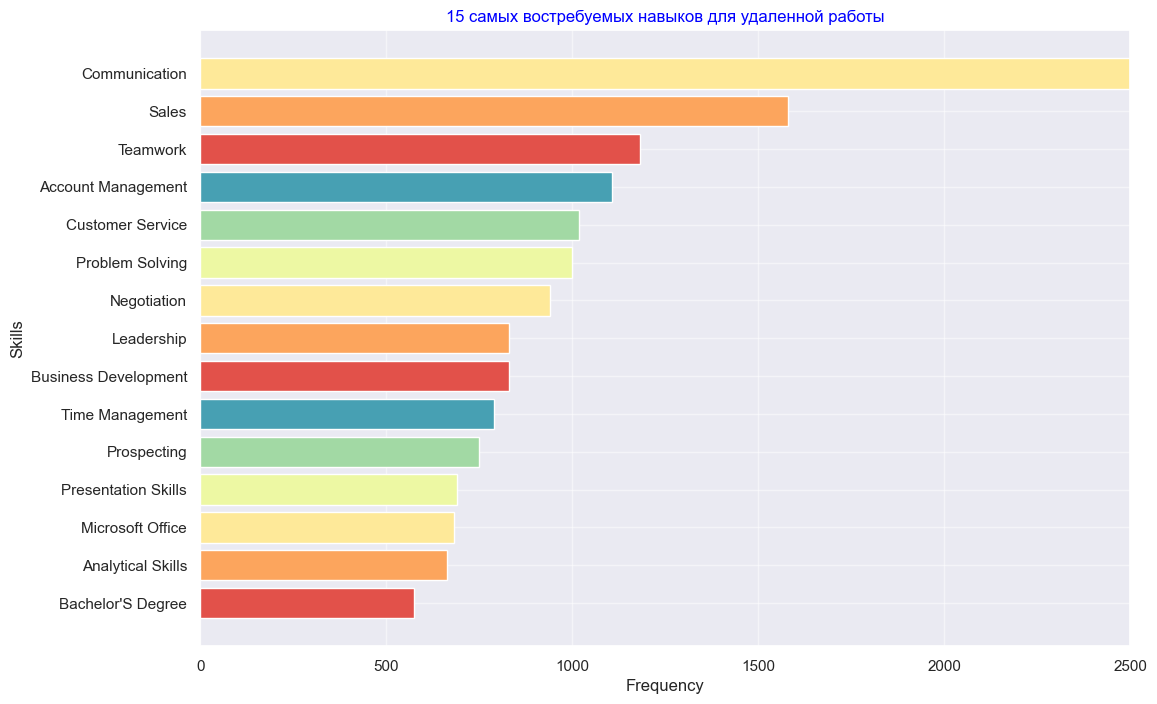

In [50]:
postings_1 = postings.loc[postings['job_type'] == 'Remote']
skills_df1 = linkloc(postings_1, skills_df)

skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skill=str(skill).replace('Communication Skills','Communication').replace('Relationship Building','Communication').replace('Problemsolving','Problem Solving')
    skill=str(skill).replace('Microsoft Office Suite','Microsoft Office').replace('Collaboration','Teamwork').replace('Interpersonal Skills','Communication').replace('Salesforce','Sales')
    skill=str(skill).replace('Data Analysis','Analytical Skills').replace('Lead Generation','Leadership').replace('Customer Relationship Management','Customer Service')
    skills += skill.lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков для удаленной работы', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 2500)
plt.show()

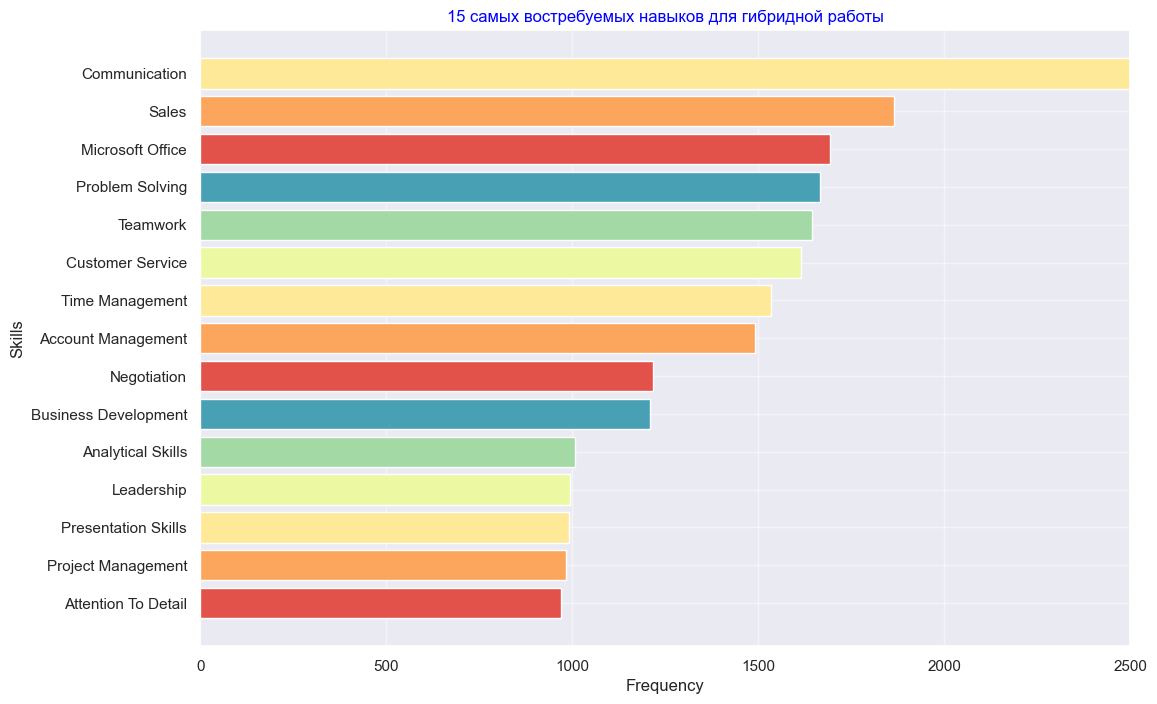

In [51]:
postings_1 = postings.loc[postings['job_type'] == 'Hybrid']
skills_df1 = linkloc(postings_1, skills_df)

skills_df1.head(5)
skills = ''
for skill in skills_df1.job_skills:
    skill=skill.replace('Communication Skills','Communication').replace('Relationship Building','Communication').replace('Problemsolving','Problem Solving')
    skill=skill.replace('Microsoft Office Suite','Microsoft Office').replace('Collaboration','Teamwork').replace('Interpersonal Skills','Communication').replace('Salesforce','Sales')
    skill=skill.replace('Data Analysis','Analytical Skills').replace('Lead Generation','Leadership').replace('Customer Relationship Management','Customer Service')
    skills += skill.lower()

skills = skills.split(', ')
skills[:10], len(skills)

from collections import Counter
counts = Counter(skills)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('15 самых востребуемых навыков для гибридной работы', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 2500)
plt.show()

На гибридной и удаленной работе часто требуются специалисты в области бизнеса и продаж(Sales, Business Development,Negotiation).

In [52]:
skills_df_copy = skills_df.copy(deep=True)

def count(row):
  return len(str(row['job_skills']).split(', '))

skills_df_copy['skills_numbers'] = skills_df_copy.apply(count, axis=1)#добавляем новый столбик, в котором хранится количество скиллов

skills_df_copy.sample(10)

,job_link,job_skills,skills_numbers
532684,https://www.linkedin.com/jobs/view/team-lead-a...,"Sales leadership, Customer experience, Team ma...",19
425200,https://www.linkedin.com/jobs/view/research-en...,"MATLAB, Simulink, PLECS, Electrical machines, ...",32
327853,https://www.linkedin.com/jobs/view/retail-staf...,"Retail sales, Customer service, Management exp...",18
231294,https://www.linkedin.com/jobs/view/advanced-pr...,"Physician Assistant, Nurse Practitioner, Licen...",21
471920,https://www.linkedin.com/jobs/view/overnight-t...,"Customer service, Sales, Merchandising, Invent...",26
1198475,https://www.linkedin.com/jobs/view/psychiatris...,"Psychiatry, Mental Health, Treatment Methods, ...",15
609146,https://www.linkedin.com/jobs/view/distinguish...,"Generative AI Systems, Distributed Computing S...",13
141498,https://www.linkedin.com/jobs/view/permanent-p...,"Clinical Psychologist, Neurologist, Pediatrici...",16
587382,https://www.linkedin.com/jobs/view/nail-techni...,"Nail Technician, Customer Service, Manicures, ...",25
1052389,https://www.linkedin.com/jobs/view/hospital-me...,"Meditech, EMR, Physician, FT Positions, Day, R...",8


In [53]:
_set = set(postings.search_position)

_dict={}
for ellem in _set:
  postings_1 = postings.loc[postings['search_position'] == str(ellem)]
  skills_df1 = linkloc(postings_1, skills_df_copy)

  _dict[str(ellem)] = skills_df1['skills_numbers'].mean()

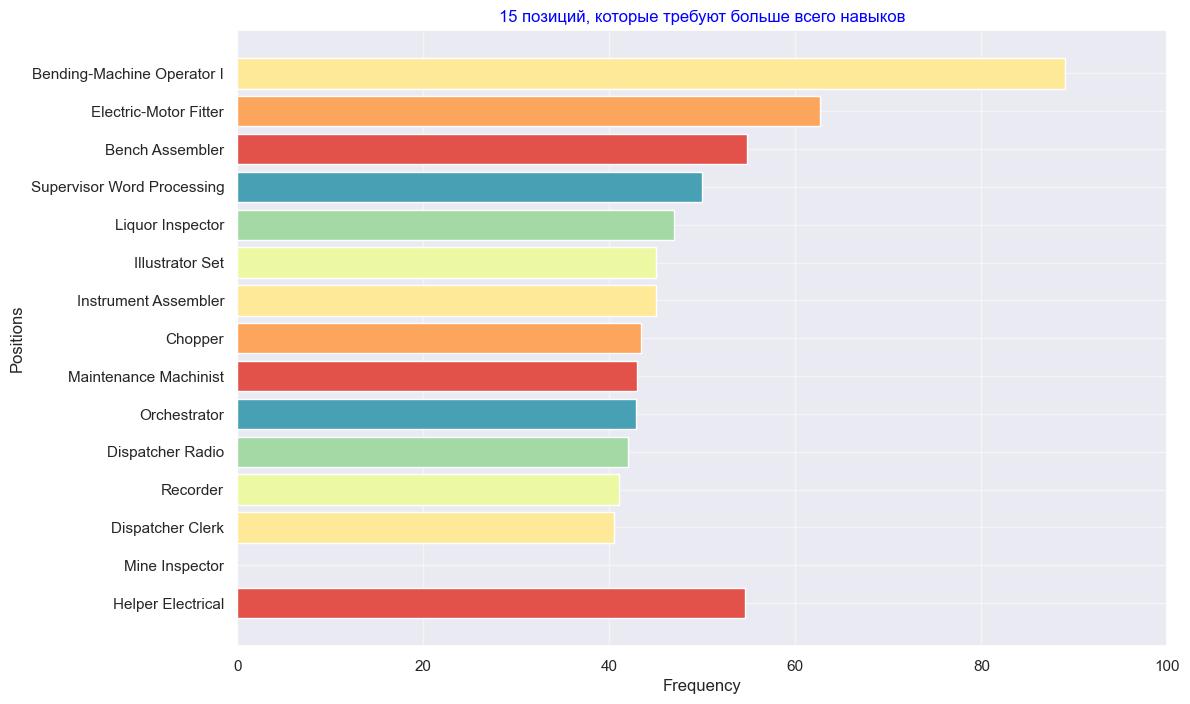

In [54]:
from collections import Counter
counts = Counter(_dict)
common_dict = counts.most_common(15)

labels, values = zip(*common_dict)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Positions')
plt.title('15 позиций, которые требуют больше всего навыков', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 100)
plt.show()

# Поиск главных офисов для различных компаний

Попробуем, проанализировав кол-во вакансий в зависимости от города, находить главные офисы компаний

### SpaceX

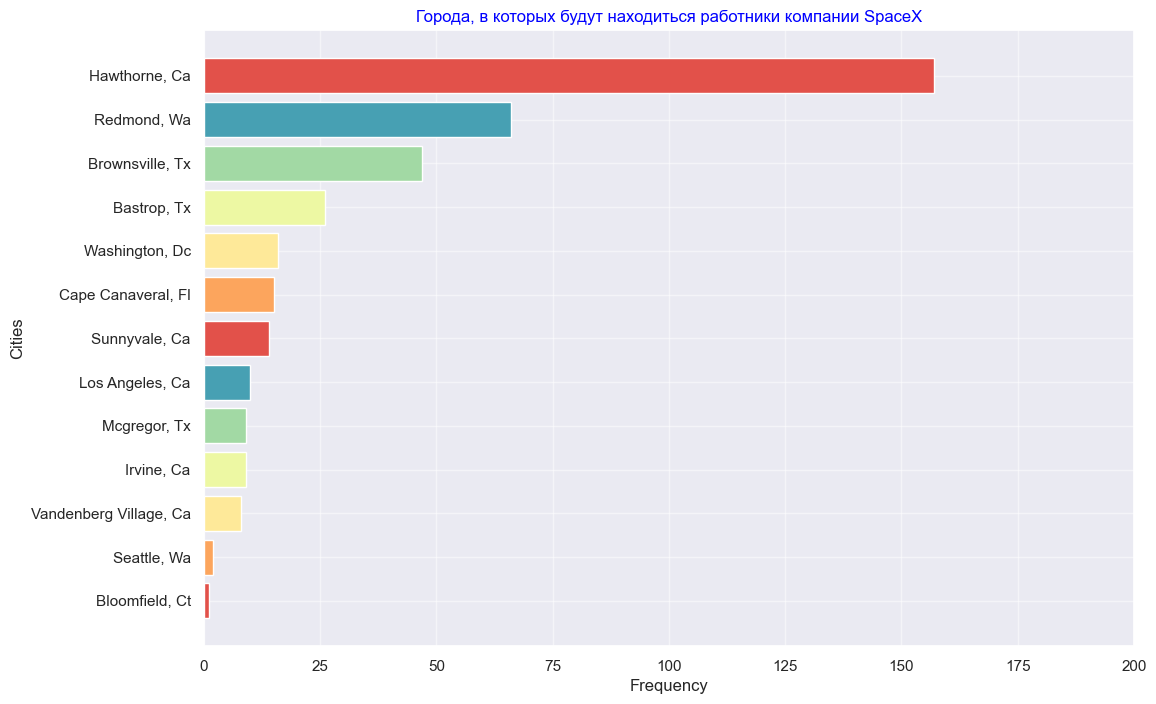

In [55]:
postings2 = postings[postings['company'] =='SpaceX']

cities = ''
for city in postings2.job_location:
    cities = cities + ';'+ city

cities = cities.split(';')[1:]

from collections import Counter
counts = Counter(cities)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Города, в которых будут находиться работники компании SpaceX', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 200)
plt.show()

Отсюда можно сделать вывод, что главный офис компании SpaceX находится в Hawthorne. Также у компании есть не мало рабочих мест в других городах штата Калифорния, и в других штатах, таких как Вашингтон и Техас.

### Walmart USA

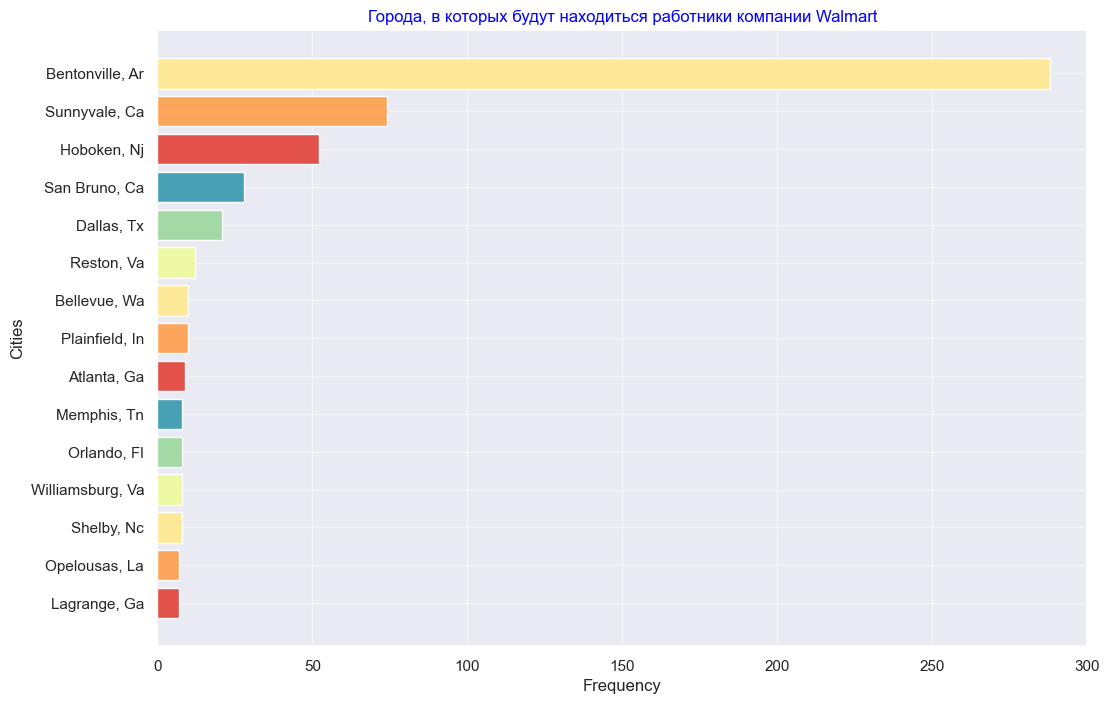

In [56]:
postings2 = postings[(postings['company'] =='Walmart') & (postings['search_country'] =='United States')]

cities = ''
for city in postings2.job_location:
    cities = cities + ';'+ city

cities = cities.split(';')[1:]

from collections import Counter
counts = Counter(cities)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Города, в которых будут находиться работники компании Walmart', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 300)
plt.show()

Главный офис американского подразделения Walmart действительно находится в Бентонвилле

### Amazon

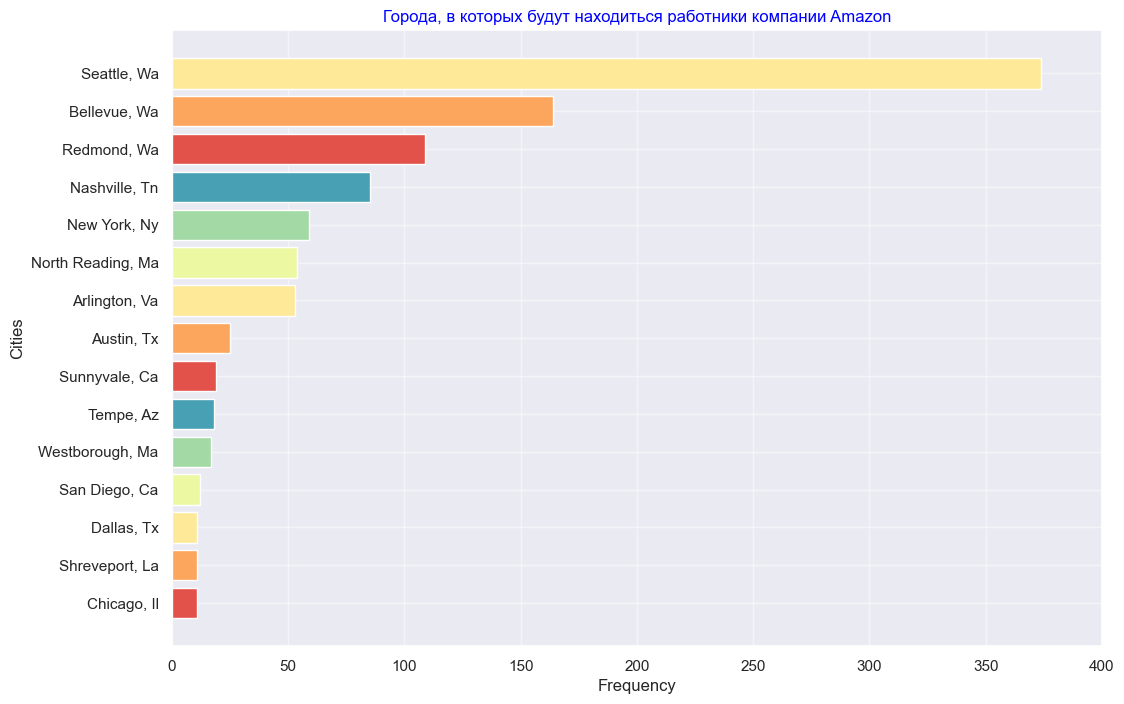

In [57]:
postings2 = postings[(postings['company'] =="Amazon") & (postings['search_country'] =='United States')]

cities = ''
for city in postings2.job_location:
    cities = cities + ';'+ city

cities = cities.split(';')[1:]

from collections import Counter
counts = Counter(cities)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Города, в которых будут находиться работники компании Amazon', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 400)
plt.show()

У Amazon главный офис действительно находится в Сиетле

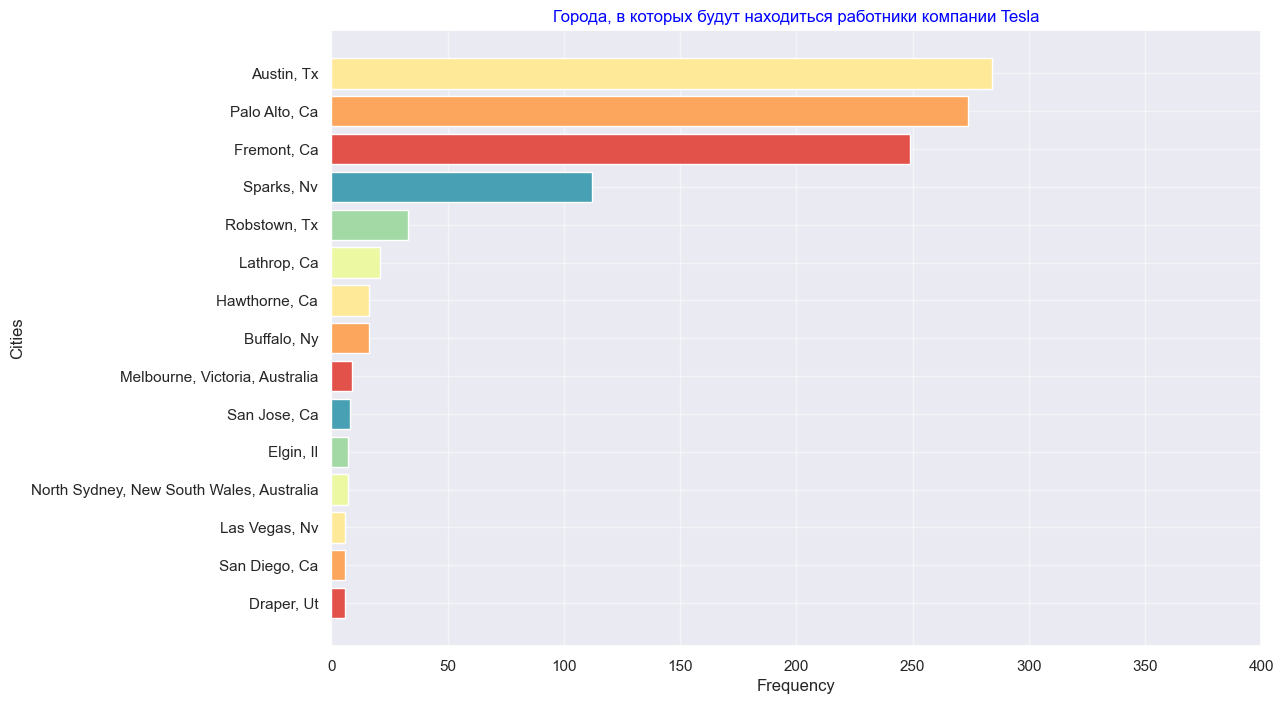

In [58]:
postings2 = postings[(postings['company'] =="Tesla")]

cities = ''
for city in postings2.job_location:
    cities = str(cities) + ';'+ str(city)

cities = cities.split(';')[1:]

from collections import Counter
counts = Counter(cities)
common_skills = counts.most_common(15)
common_skills
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("Spectral"))



plt.xlabel('Frequency')
plt.ylabel('Cities')
plt.title('Города, в которых будут находиться работники компании Tesla', color='blue')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 400)
plt.show()

Немного поинтереснее ситуация с компанией Tesla - тут выделяется сразу три города. Здания в Остине и Фримонтие - крупнейшие заводы по производству автомобилей тесла, а здание в Пало Альто - первоначальный главный штаб тесла, а с 2023 году было объявлено, что здание станет глобальной инженерной штаб квартирой